/Users/stefan/anaconda3/lib/python3.11/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


asdfasd


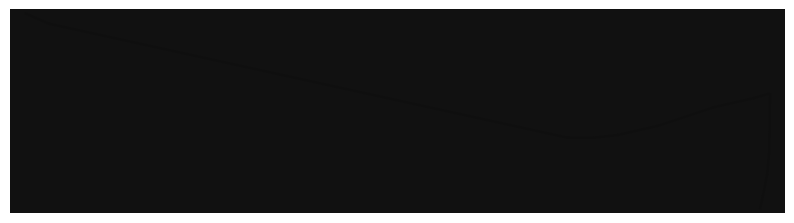

In [31]:
"""
now trying to calculate route from first to last waypoint of each linepoint
"""
import uuid
import gpxpy
import gpxpy.gpx
import numpy as np
import osmnx as ox
import networkx as nx
from itertools import combinations
import shapely
import gpxpy.gpx
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors

# Step 1: Create a Street Network Graph
place_name = "Lustenau, Vorarlberg, Austria"
custom_filter = '["highway"!~"motorway|motorway_link"]["access"!~"private"]'

# 4 = {str} 'unclassified'

# Create the graph using the custom filter
# G = ox.graph_from_place(place_name, network_type='drive', custom_filter=custom_filter, simplify=False)
G = ox.graph_from_place(place_name, network_type='drive', simplify=False)
G_proj = G.to_undirected()
G = G_proj
stats = ox.basic_stats(G_proj)

lustenau_nodes_df, lustenau_edges_df = ox.graph_to_gdfs(G_proj)

motorway_df = lustenau_edges_df[
    lustenau_edges_df['highway'].str.contains("motor") | lustenau_edges_df['maxspeed'].astype('float').ge(70)]

G_proj.remove_edges_from(motorway_df.highway.keys())

ox.config(use_cache=True, log_console=True)

isolated_nodes = list(nx.isolates(G_proj))

# Remove isolated nodes
G_proj.remove_nodes_from(isolated_nodes)

isolated_nodes = list(nx.isolates(G_proj))

if not nx.is_connected(G_proj):
    connected_components = list(nx.connected_components(G))

    colors = list(mcolors.CSS4_COLORS.values())  # More color options
    num_colors = len(colors)

    # Plot the graph with OpenStreetMap basemap
    fig, ax = ox.plot_graph(G, show=False, close=False, bgcolor="#111111", edge_color="#00000000", edge_linewidth=0.5,
                            node_size=0, figsize=(10, 10), dpi=300, save=True, filepath='fooooo.png')

    colors = ['#00FF00', '#FF0000', '#0000FF', '#0F0F0F', '#F0F0F0']

    # Plot each component with a different color
    for i, component in enumerate(connected_components):
        if i < 3:
            continue
        subgraph = G.subgraph(component)
        color = colors[i % num_colors]
        ox.plot_graph(subgraph, close=False, show=False, ax=ax, bgcolor="#111111", edge_color=color, edge_linewidth=1.5, node_size=0)
        print("asdfasd")
        break

    # Show the plot with the OSM basemap
    plt.show()
else:
    print("laksdjf")
    

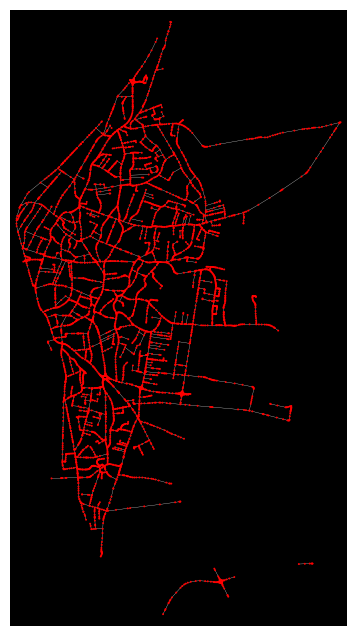

In [3]:
 fig, ax = ox.plot_graph(G_proj.to_undirected(), node_size=2, bgcolor='k', node_color='r', edge_color='w', edge_linewidth=0.2, close=False, show=False)